# 거리 행렬<a href="#거리-행렬" class="anchor-link">¶</a>

## cdist: XA \~ XB<a href="#cdist:-XA-~-XB" class="anchor-link">¶</a>

scipy.spatial.distance.cdist(XA, XB, metric='euclidean', \*, out=None,
\*\*kwargs)

Parameters

-   XA: array_like
-   XB: array_like
-   metric: str or callable, optional
    -   'cityblock'
    -   'correlation'
    -   'cosine'
    -   'euclidean',
    -   'jaccard',
    -   'mahalanobis'
    -   'matching'

## pdist: XA \~ XA<a href="#pdist:-XA-~-XA" class="anchor-link">¶</a>

scipy.spatial.distance.pdist(X, metric='euclidean', \*, out=None,
\*\*kwargs)

# 군집화 모델<a href="#군집화-모델" class="anchor-link">¶</a>

## 계층적 군집화<a href="#계층적-군집화" class="anchor-link">¶</a>

### 모델링<a href="#모델링" class="anchor-link">¶</a>

sklearn.cluster.AgglomerativeClustering(n_clusters=2, \*,
affinity='euclidean', memory=None, connectivity=None,
compute_full_tree='auto', linkage='ward', distance_threshold=None,
compute_distances=False)

Parameters

-   affinity: str or callable, default= 'euclidean'. Metric used to
    compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”,
    “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean”
    is accepted. If “precomputed”, a distance matrix (instead of a
    similarity matrix) is needed as input for the fit method.

-   linkage: {'ward', 'complete', ‘average’, ‘single’}, default=’ward’

Attributes

-   labels\_: ndarray of shape (n_samples)

In \[3\]:

    from sklearn.cluster import AgglomerativeClustering
    import numpy as np
    X = np.array([[1, 2], [1, 4], [1, 0],
                  [4, 2], [4, 4], [4, 0]])
    clustering = AgglomerativeClustering().fit(X)
    clustering.labels_

Out\[3\]:

    array([1, 1, 1, 0, 0, 0], dtype=int64)

### 덴드로그램<a href="#덴드로그램" class="anchor-link">¶</a>

In \[6\]:

    import numpy as np

    from matplotlib import pyplot as plt
    from scipy.cluster.hierarchy import dendrogram
    from sklearn.datasets import load_iris
    from sklearn.cluster import AgglomerativeClustering

    def plot_dendrogram(model, **kwargs):
        children = model.children_
        distance = np.arange(children.shape[0])
        no_of_observations = np.arange(2, children.shape[0]+2)
        linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
        dendrogram(linkage_matrix)
        plt.show()


    iris = load_iris()
    x = iris.data[:20]
    model = AgglomerativeClustering(n_clusters=3).fit(x)

    plt.title('Hierarchical Clustering Dendrogram')
    plot_dendrogram(model, labels=model.labels_)

![](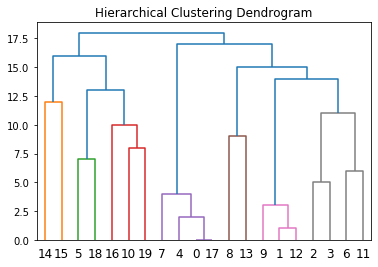%0A)

## k-means<a href="#k-means" class="anchor-link">¶</a>

class sklearn.cluster.KMeans(n_clusters=8, \*, init='k-means++',
n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated',
verbose=0, random_state=None, copy_x=True, n_jobs='deprecated',
algorithm='auto')

Parameters

-   n_clusters, int: The number of clusters to form as well as the
    number of centroids to generate.

In \[7\]:

    from sklearn.cluster import KMeans
    import numpy as np
    X = np.array([[1, 2], [1, 4], [1, 0],
                 [10, 2], [10, 4], [10, 0]])

    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    print(kmeans.labels_)
    print(kmeans.predict([[0, 0], [12, 3]]))
    print(kmeans.cluster_centers_)

    [1 1 1 0 0 0]
    [1 0]
    [[10.  2.]
     [ 1.  2.]]

## DBSCAN<a href="#DBSCAN" class="anchor-link">¶</a>

sklearn.cluster.DBSCAN(eps=0.5, \*, min_samples=5, metric='euclidean',
metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

Parameters

-   eps, float, default=0.5: The maximum distance between two samples
    for one to be considered as in the neighborhood of the other. This
    is not a maximum bound on the distances of points within a cluster.
    This is the most important DBSCAN parameter to choose appropriately
    for your data set and distance function.

-   min_samples, int, default=5: The number of samples (or total weight)
    in a neighborhood for a point to be considered as a core point. This
    includes the point itself.

-   metric: string, or callable, default=’euclidean’/ precomputed도 가능

In \[8\]:

    from sklearn.cluster import DBSCAN
    import numpy as np
    X = np.array([[1, 2], [2, 2], [2, 3],
                  [8, 7], [8, 8], [25, 80]])
    clustering = DBSCAN(eps=3, min_samples=2).fit(X)
    clustering.labels_ # -1은 이상치

Out\[8\]:

    array([ 0,  0,  0,  1,  1, -1], dtype=int64)

## 가우시안 혼합 (EM 알고리즘)<a href="#가우시안-혼합-(EM-알고리즘)" class="anchor-link">¶</a>

class sklearn.mixture.GaussianMixture(n_components=1, \*,
covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100,
n_init=1, init_params='kmeans', weights_init=None, means_init=None,
precisions_init=None, random_state=None, warm_start=False, verbose=0,
verbose_interval=10)

Parameters

-   n_components: int, default=1, The number of mixture components.
-   max_iterint, default=100: The number of EM iterations to perform.
-   init_params: {‘kmeans’, ‘random’}, default=’kmeans, The method used
    to initialize the weights, the means and the precisions. Must be one
    of:

In \[14\]:

    import numpy as np
    from sklearn.mixture import GaussianMixture
    X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
    gm = GaussianMixture(n_components=2, random_state=0).fit(X)
    gm.means_
    print(gm.predict([[0, 0], [12, 3]]))
    print(gm.predict_proba([[0, 0], [12, 3]]))

    [1 0]
    [[0. 1.]
     [1. 0.]]

# 군집 결과 평가<a href="#군집-결과-평가" class="anchor-link">¶</a>

## 실루엣 계수<a href="#실루엣-계수" class="anchor-link">¶</a>

전체 실루엣 계수의 평균값, 즉 silhouette_score() 값은 0\~1 사이의 값을
가지며, 1에 가까울 수록 좋다.

sklearn.metrics.silhouette_score(X, labels, \*, metric='euclidean',
sample_size=None, random_state=None, \*\*kwds)

-   X: array-like of shape (n_samples_a, n_samples_a) if metric ==
    “precomputed” or (n_samples_a, n_features) otherwise. An array of
    pairwise distances between samples, or a feature array.

-   labels: array-like of shape (n_samples,). Predicted labels for each
    sample.

-   metric: str or callable, default=’euclidean'. The metric to use when
    calculating distance between instances in a feature array. If metric
    is a string, it must be one of the options allowed by
    metrics.pairwise.pairwise_distances. If X is the distance array
    itself, use metric="precomputed".

### 예제: 군집 개수 결정<a href="#예제:-군집-개수-결정" class="anchor-link">¶</a>

In \[11\]:

    from sklearn.metrics import silhouette_score
    range_n_clusters = [2,3,4,5,6,7]
    X = [[1,2],[3,4],[3,4],[5,6],[2,3],[4,5],[6,7],[1,2],[2,5]]

    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters)
        preds = clusterer.fit_predict(X)
        centers = clusterer.cluster_centers_

        score = silhouette_score(X, preds)
        print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

    For n_clusters = 2, silhouette score is 0.4995237159561351)
    For n_clusters = 3, silhouette score is 0.5309162872372101)
    For n_clusters = 4, silhouette score is 0.39411096747355967)
    For n_clusters = 5, silhouette score is 0.4444444444444444)
    For n_clusters = 6, silhouette score is 0.5)
    For n_clusters = 7, silhouette score is 0.4444444444444444)

In \[ \]: